**Introduction**
Irrespective of what your primary area of work is, you need a basic understanding in finance .
Risk is present virtually in every decision and it can not be completely eliminated. The objective in decision making is to minimize with proper assessment. While the meaning of risk and returns can be grasped quickly to make better financial decisions it is important to have quantitative understanding of the concepts.

**Business Understanding**
1) How should one measure rate of return on risky assets such as equity stocks ?

2) What factors determine the rates of returns in a market economy?

3) What is the expected Rate of return of the stock?

4) How does Risk emanates from dispersion of returns?

5) How does diversification of portfolio  reduce risk?

In [3]:
pip install -U selenium

  Using cached selenium-3.141.0-py2.py3-none-any.whl (904 kB)
Note: you may need to restart the kernel to use updated packages.


**Data Gatheration and Understanding**

The following sections will focus on data gatheration and cleanliness
 
Here, I have used https://www.screener.in/ to scrape the data.
The data is coverted in a dictionary and then saved in a pandas dataframe which i have then converted into a csv file.

What this  function essentially does is moves the cursor in step size and end limit (date) provided

**NOTE** Here i have stayed consistent with this https://www.screener.in/ site. Therefore the webelements have been same throughout.
If you change the site you will have to search for specific web elements according to the site.
**It is importanat to bear in mind while scraping that you are not violating any terms and conditions of that site**

In [56]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import datetime as dt
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [86]:
def Connect_to_page(my_url):
    """"
    Arguments: url to the page you want to scarpe
    
    Returns: Dictionary and dataframe of the data
    """"
    option = Options()
    option.headless = False
    driver = webdriver.Chrome(executable_path='C:/webdrivers/chromedriver.exe')
    # driver = webdriver.Chrome(options=option)
    driver.get(my_url)
    driver.maximize_window()

# ACTIONS

    action = webdriver.ActionChains(driver)
    e1 = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, "//html/body/main/div/section[2]/div[1]/div[1]/button[7]")))
    action.click(e1).perform()

    e = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, "/html/body/main/div/section[2]/div[2]/div[2]/div[2]/canvas")))
    location = e.location
    size = e.size
    print(location)
    print(size)
    action.move_to_element_with_offset(e, 1156, 0).perform()

# Move the cursor until limit
    Dict = {}
    limit = dt.datetime.strptime("27 Feb 09", "%d %b %y")
    while True:
        action.move_by_offset(-10, 0).perform()
        date = driver.find_element_by_xpath("/html/body/main/div/section[2]/div[2]/div[2]/div[1]/div[2]/div[3]").text
        value = driver.find_element_by_xpath("/html/body/main/div/section[2]/div[2]/div[2]/div[1]/div[2]/div[1]").text

        if dt.datetime.strptime(date, "%d %b %y") < limit:
            break

        Dict[date] = value
        if date in Dict:
            pass
        else:
            Dict[date] = value

    #print(Dict)
    driver.quit()
    df = pd.DataFrame.from_dict(Dict, orient='index')
    df.columns = ['Price']
    #df = pd.Dataframe.from_dict(list(Dict.items()),columns = ['Months','Price'] )
    print(df)
    df.to_csv(r'C:\Users\hp\Documents\scraped_data\Pharma_2.csv')
    return df, Dict
    
    

In [ ]:
get_df, get_Dict = Connect_to_page(my_url = 'https://www.screener.in/company/INFY/consolidated/#chart')


In [58]:
get_df, get_Dict = Connect_to_page(my_url = 'https://www.screener.in/company/INFY/consolidated/#chart')


{'x': 96, 'y': 710}
{'height': 375, 'width': 1156}


In [135]:
get_df.head()

,Price
21 Aug 20,957.66
10 Jul 20,779.28
22 May 20,673.32
27 Mar 20,603.63
01 Feb 20,780.33


In [1]:
print(get_Dict)

In [118]:
''''
df = pd.DataFrame(list(get_Dict.items()),columns = ['Months','Price']) 
#df = pd.DataFrame(Dict,columns = ['Months','Price']) 
df['Months']=pd.to_datetime(df['Months'])
df.set_index('Months', inplace=True)
#df['Months'] = df["Months"].dt.strftime("%Y")
df.head(100)
''''

,Price
Months,
2020-08-21,957.66
2020-07-10,779.28
2020-05-22,673.32
2020-03-27,603.63
2020-02-01,780.33
...,...
2009-11-06,275.65
2009-09-11,278.14
2009-07-24,244.92


**NOTE** Since running the scraping function again and again takes long I have saved the data in a CSV file and loaded it.
 To understand how the scraping function works I insist to run the cells above this. 

**Data Preparation**
The gathered data is not consistent.
The datatypes of the columns are diffrent and to do preprare them for analysis they need to be converted into consistent types.
Since we will be working with years its easier the convert the months column into datetime format.We will stick to this format throughout most of the data preperation stages.

In [4]:
df = pd.read_csv(r"C:\Users\hp\Documents\scraped_data\Stock_Infy_2.csv")

df['Months']=pd.to_datetime(df['Months'])
df.set_index('Months', inplace=True)
#df['Months'] = df["Months"].dt.strftime("%Y")
df.head()

,Price
Months,
2020-08-21,957.66
2020-07-10,779.28
2020-05-22,673.32
2020-03-27,603.63
2020-02-01,780.33


In [5]:
def end_prices(df):
    """
    Arguments : scraped dataframe
    
    Returns : Prices at the end of the year
    """
   
    Ending_Prices1 = df[df.index.month.isin([12])]
    Ending_Prices2 = df[df.index.month.isin([11])]
    Ending_Prices = pd.DataFrame()
    Ending_Prices = Ending_Prices.append([Ending_Prices1, Ending_Prices2])
    #print (Ending_Prices)
    Ending_Prices = Ending_Prices.reset_index()
    Ending_Prices['Months'] = pd.to_datetime(Ending_Prices['Months'])
    Ending_Prices['Months'] = Ending_Prices["Months"].dt.strftime("%Y")
    Ending_Prices.sort_values(by='Months', ascending=True)
    Ending_Prices['Months']=Ending_Prices['Months'].apply(pd.to_numeric, errors='coerce')
    Ending_Prices['Price']=Ending_Prices['Price'].apply(pd.to_numeric, errors='coerce')
    Ending_Prices.sort_values("Months", inplace = True)
    Ending_Prices.drop_duplicates(subset = "Months", inplace = True)
    #End = End.drop(End.index[-1:])
    

    
    return Ending_Prices

In [6]:
def begin_prices(df):
    """
    Args: scraped dataframe
    
    Returns: Prices at the begining of the year
    """
    
    Begining_Prices1= df[df.index.month.isin([1])]
    Begining_Prices2= df[df.index.month.isin([2])]
    Begining_Prices3= df[df.index.month.isin([3])]
    Begining_Prices4= df[df.index.month.isin([4])]
    Begining_Prices = pd.DataFrame()
    Begining_Prices = Begining_Prices.append([Begining_Prices1,Begining_Prices2,Begining_Prices3, Begining_Prices4])
    #Begining_Prices.to_csv(r"C:\Users\hp\Documents\scraped_data\Begin_data1.csv")
    Begining_Prices = Begining_Prices.reset_index()

    Begining_Prices['Months'] = pd.to_datetime(Begining_Prices['Months'])
    Begining_Prices['Months'] = Begining_Prices["Months"].dt.strftime("%Y")

    Begining_Prices.sort_values(by='Months', ascending=True)
    Begining_Prices['Months']=Begining_Prices['Months'].apply(pd.to_numeric, errors='coerce')
    Begining_Prices['Price']=Begining_Prices['Price'].apply(pd.to_numeric, errors='coerce')
    Begining_Prices.sort_values("Months", inplace = True)
    Begining_Prices.drop_duplicates(subset = "Months", inplace = True)
    #Begin=Begin.reset_index()
    #Begin = Begin.drop(Begin.index[-1:])
    #print(Begining_Prices.dtypes)
    #Begining_Prices.head()
    
    return Begining_Prices

In [7]:
Begining_Prices_INFY =begin_prices(df)
Begining_Prices_INFY.head()

,Months,Price
25,2009,169.33
11,2010,315.63
19,2011,380.25
18,2012,356.30
17,2013,357.96


In [8]:
Ending_Prices_INFY =end_prices(df)
Ending_Prices_INFY.head()

,Months,Price
3,2009,323.26
10,2010,380.28
9,2011,332.82
8,2012,305.32
2,2013,420.55


**How to work with dividend values**
Here again the scraped data was very inconsistent. Thus I have saved in to a csv file for easy analysis.

In [137]:
def Dividends(my_url):
    """
    Args: url to scrape Dividend values 
    Returns: dataframe, dictionary
    """
    
    #my_url = 'https://www.screener.in/company/RELIANCE/consolidated/#chart'
    option = Options()
    option.headless = False
    driver = webdriver.Chrome(executable_path='C:/webdrivers/chromedriver.exe')
    driver = webdriver.Chrome(options=option)
    driver.get(my_url)
    driver.maximize_window()
    action = webdriver.ActionChains(driver)
    e1 = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "/html/body/main/div/nav[2]/div/a[6]")))
    action.click(e1).perform()

    e2 = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH,
                                                        "/html/body/main/div/section[6]/div[3]/table/tbody/tr[12]")))
    element_text = e2.text
    #element_attribute_value = e2.get_attribute('value')

    #print(e2)

    divs= 'e2.text: {0}'.format(element_text)
    print (divs)
    #print('e2.get_attribute(\'value\'): {0}'.format(element_attribute_value))

    #Get months corresponding to dividend values
    e3 = WebDriverWait(driver, 10).until(EC.element_to_be_clickable(
    (By.XPATH, "/html/body/main/div/section[6]/div[3]/table/thead/tr")))
    element1_text = e3.text
    #element1_attribute_value = e3.get_attribute('value')

#print(e3)

    dates ='e3.text: {0}'.format(element1_text)
    print(dates)
    #print('e3.get_attribute(\'value\'): {0}'.format(element1_attribute_value))

    driver.quit()
    class my_dictionary(dict):
        # __init__ functio
        def __init__(self):
            self = dict()

        # Function to add key:value

        def add(self, key, value):
            self[key] = value

    dict_obj = my_dictionary()
    dict_obj.key = dates
    dict_obj.value = divs
    dict_obj.add(dict_obj.key, dict_obj.value)
    #print(dict_obj)
    df = pd.DataFrame.from_dict(dict_obj, orient='index')
    #print(df)
    return df, dict_obj


In [138]:
get_INFY_df, get_INFY_dict_obj = Dividends('https://www.screener.in/company/INFY/consolidated/#chart')

e2.text: Dividend Payout % 22% 23% 50% 32% 25% 34% 55% 41% 41% 59% 60% 45%
e3.text: Mar 2009 Mar 2010 Mar 2011 Mar 2012 Mar 2013 Mar 2014 Mar 2015 Mar 2016 Mar 2017 Mar 2018 Mar 2019 Mar 2020 TTM


In [139]:
get_INFY_df.to_csv(r'C:\Users\hp\Documents\scraped_data\table_scrape2.csv')

**NOTE** Since running the scraping function again and again takes long I have saved the data in a CSV file and loaded it.
 To understand how the scraping function works I insist to run the cells above this.

In [9]:
Dividend = pd.read_csv(r"C:\Users\hp\Documents\scraped_data\table_scrape2.csv")
Dividend.head()

,Months,Dividend_Payout %
0,01-03-2009,22%
1,Mar 2010,23%
2,01-03-2011,50%
3,01-03-2012,32%
4,Mar 2013,25%


**We want to deal with years instead of months heneceforth since we have got the ending and begining values of the years from above cells.


In [10]:
def dividend_calc(df):
    df['Months'] = pd.to_datetime(df['Months'])
    df['Months'] = df["Months"].dt.strftime("%Y")
    #Dividend = Dividend.drop(Dividend.index[0:5])
    #Dividend = Dividend.drop(Dividend.index[-2:])
    df['Dividend_Payout %'] = df['Dividend_Payout %'].map(lambda x: x.rstrip('%'))
    df=df.apply(pd.to_numeric, errors='coerce')
    #print(df)
    #Dividend=Dividend.reset_index()
    #print(df.dtypes)
    return df

**We want the dividend values in terms of prices(rupees) instead of percentages so we need to convert them accordingly**

In [11]:
Dividend_Infy = dividend_calc(Dividend)
Dividend_Infy['Dividend_Payout %'].apply(pd.to_numeric, errors='coerce')
Dividend_Infy['Dividend_Payout %']= Dividend_Infy['Dividend_Payout %']/100
Dividend_Infy['Dividend_Payout %']= Dividend_Infy['Dividend_Payout %']*5
#Dividend_Infy.head()
Dividend_Infy.head(100)

,Months,Dividend_Payout %
0,2009,1.10
1,2010,1.15
2,2011,2.50
3,2012,1.60
4,2013,1.25
5,2014,1.70
6,2015,2.75
7,2016,2.05
8,2017,2.05
9,2018,2.95


In [12]:
# So we can calculate RORS for following Years
import numpy as np

np.intersect1d(Dividend_Infy.Months, np.intersect1d(Ending_Prices_INFY.Months, Begining_Prices_INFY.Months))


array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [13]:
Ending_Prices_INFY =Ending_Prices_INFY.drop_duplicates()
Begining_Prices_INFY =Begining_Prices_INFY.drop_duplicates()
Final = pd.merge(Ending_Prices_INFY, Begining_Prices_INFY, on="Months", how ='inner')
Final = Final.dropna()
Final.head(100)

,Months,Price_x,Price_y
0,2009,323.26,169.33
1,2010,380.28,315.63
2,2011,332.82,380.25
3,2012,305.32,356.30
4,2013,420.55,357.96
5,2014,488.30,463.27
6,2015,567.47,551.69
7,2016,477.98,551.94
8,2017,489.39,510.45
9,2018,651.05,577.14


In [14]:
Final = Final.rename(columns={"Price_y": "Begin", "Price_x": "End"})
Final.head(11)

,Months,End,Begin
0,2009,323.26,169.33
1,2010,380.28,315.63
2,2011,332.82,380.25
3,2012,305.32,356.30
4,2013,420.55,357.96
5,2014,488.30,463.27
6,2015,567.47,551.69
7,2016,477.98,551.94
8,2017,489.39,510.45
9,2018,651.05,577.14


In [15]:
#Dividend_Infy= Dividend_Infy.drop(Dividend_Infy.index[[0,1,2,6,7,8,11]])
#Dividend_Infy['Dividend_Payout %']=Dividend_Infy['Dividend_Payout %'].apply(pd.to_numeric, errors='coerce')
#Dividend_Infy.head(20)

In [16]:
Final_1 = pd.merge(Final, Dividend_Infy, on ='Months')
Final_1 = Final_1.rename(columns={"Dividend_Payout %": "Dividend_Payout(Rs)", "Months": "Years"})
print(Final_1)

    Years     End   Begin  Dividend_Payout(Rs)
0    2009  323.26  169.33                 1.10
1    2010  380.28  315.63                 1.15
2    2011  332.82  380.25                 2.50
3    2012  305.32  356.30                 1.60
4    2013  420.55  357.96                 1.25
5    2014  488.30  463.27                 1.70
6    2015  567.47  551.69                 2.75
7    2016  477.98  551.94                 2.05
8    2017  489.39  510.45                 2.05
9    2018  651.05  577.14                 2.95
10   2019  713.25  736.87                 3.00


**Data Modeling:

Now we have clean and prepared the data set to calculate Rate of Returns expected Rate of Returns and Standarad deviation(Risk)
for the stocks.

**Rate of Return is calculated as Dividend/Beginin prices + (Ending Prices -  Begining Prices)/ Begining Prices

**Expected Rate of Return(%) is calculated ad weighted average of all possible Return multiplied by their Respective probabilities.

**Variance is calculated as squared difference of Returns and Expected Rate of return multiplied by the respctive probabilities

**Standard Deviation is calculated the square root of the sumation of all the variances.

In [17]:
def calculate_ROR(df):
    # CALCULATE ROR, EROR, SD
    Current_yield = df['Dividend_Payout(Rs)'].to_numpy()/(df['Begin'].to_numpy())
#Current_yield = Dividend.to_numpy()/Begin.to_numpy()
    print("Current_yield:",Current_yield)
#Capital gain
    Sub = df['End'].to_numpy()-df['Begin'].to_numpy()
#print(Sub)
    Capital_gain =Sub/df['Begin'].to_numpy()
    print("Capital Gain:",Capital_gain)
#ROR
    Rate_of_Return =(Current_yield) + (Capital_gain)
    #print("Rate of Return :", Rate_of_Return)
    ROR = pd.DataFrame(Rate_of_Return, columns =['Returns'])
    print(ROR)
    return Current_yield, Capital_gain, ROR

In [18]:
current_field, capital_gain, ROR_INFY = calculate_ROR(Final_1)

Current_yield: [0.00649619 0.00364351 0.00657462 0.0044906  0.00349201 0.00366957
 0.00498468 0.00371417 0.00401606 0.00511141 0.00407127]
Capital Gain: [ 0.90905333  0.20482844 -0.12473373 -0.14308167  0.17485194  0.05402897
  0.02860302 -0.13400007 -0.04125771  0.12806252 -0.0320545 ]
     Returns
0   0.915550
1   0.208472
2  -0.118159
3  -0.138591
4   0.178344
5   0.057699
6   0.033588
7  -0.130286
8  -0.037242
9   0.133174
10 -0.027983


In [66]:
RORS = list(ROR_INFY['Returns'])
print(RORS)

[0.9155495186913126, 0.20847194499889105, -0.11815910585141357, -0.138591074936851, 0.1783439490445861, 0.057698534332031065, 0.033587703239137866, -0.13028590064137413, -0.03724164952492899, 0.133173926603597, -0.027983226349288213]


**The following csv file consists of probability of occurances corresponding to years from 1963 to 2019. 
Assumption has been made here that if the GDP > 5.2 the state of economy is in Boom and probability is 0.25

**I have downloaded the GDP data from World Bank site and contrained the location to India only**

In [20]:
#Expected ROR
Probability_of_Occurance = pd.read_csv(r"C:\Users\hp\Documents\scraped_data\Probability_Distribution.csv")
Probability_of_Occurance.drop(Probability_of_Occurance.columns[Probability_of_Occurance.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
Probability_of_Occurance.head(20)


,Year,GDP,BOOM,NORMAL,RECN,CNT,CNT,CNT .1
0,NaN,NaN,NaN,NaN,NaN,BOOM,NORMAL,RECN
1,1963,3.84,-,-,3.84,-,0,1.00
2,1964,5.25,-,5.25,-,-,1,-
3,1965,-4.64,-,-,-4.64,-,0,1.00
4,1966,-2.12,-,-,-2.12,-,0,1.00
5,1967,5.59,-,5.59,-,-,1,-
6,1968,1.23,-,-,1.23,-,0,1.00
7,1969,4.27,-,-,4.27,-,0,1.00
8,1970,2.86,-,-,2.86,-,0,1.00
9,1971,-0.63,-,-,-0.63,-,0,1.00


In [30]:
# We need values for three states of economy therefore lets pick years 2012 -Normal, 2013 - Recession, 2014 -Boom
# Calculate EROR
#As we can see Probability of occurance for Boom in 2014 is 25%
#Probability of occurance for Normal State of economy in 2013 is 16.07%
#Probability of occurance for Recession in 2012 is 58.93%
EROR = 0.5893*(-13.85) + 0.1607*(17.83) + 0.2500*(5.76)
print('Expected Rate of return % :',EROR)

 

Expected Rate of return % : -3.8565240000000016


In [28]:
#Standard Deviation = pi(Ri -E(R^2))^2

def variance(p,R):
    piri_EROR = p*(R)
    sub = R - piri_EROR
    sub_sq = (sub)*(sub)
    std_deviation_calc = p*(sub_sq)
    return std_deviation_calc

In [29]:
import math
Variance_Boom = variance(0.5893, -13.85)
print('Variance_Boom:', Variance_Boom)
Variance_Normal = variance(0.1607, 17.83 )
print('Variance_Normal:',Variance_Normal)
Variance_Recession = variance(0.25, 5.76)
print('Variance_Recession:',Variance_Recession)
sum = Variance_Boom + Variance_Normal + Variance_Recession
Standard_Dev = math.sqrt(sum)
print('Standard Dev: %' ,Standard_Dev)



Variance_Boom: 19.067132897584123
Variance_Normal: 35.98761033015803
Variance_Recession: 4.6656
Standard Dev: % 7.727893841645481


**ALL THE ABOVE STEPS ARE PERFORMED FOR stock 2 i.e. Reliance industries LTD 

In [22]:
#FOR RELIANCE INDUSTRIES
get_df_REL, get_Dict_REL = Connect_to_page(my_url = 'https://www.screener.in/company/RELIANCE/consolidated/#chart')

In [161]:
get_df_REL.head()

,Price
21 Aug 20,2104.07
10 Jul 20,1835.11
22 May 20,1431.23
27 Mar 20,998.83
01 Feb 20,1435.87


In [162]:
print(get_Dict_REL)

{'21 Aug 20': '2104.07', '10 Jul 20': '1835.11', '22 May 20': '1431.23', '27 Mar 20': '998.83', '01 Feb 20': '1435.87', '13 Dec 19': '1554.87', '18 Oct 19': '1368.50', '23 Aug 19': '1260.47', '05 Jul 19': '1263.48', '10 May 19': '1294.82', '22 Mar 19': '1348.17', '25 Jan 19': '1226.89', '30 Nov 18': '1134.58', '12 Oct 18': '1092.82', '17 Aug 18': '1189.44', '22 Jun 18': '1005.53', '04 May 18': '953.85', '09 Mar 18': '901.31', '12 Jan 18': '930.89', '24 Nov 17': '927.66', '29 Sep 17': '794.11', '11 Aug 17': '787.37', '16 Jun 17': '670.06', '21 Apr 17': '683.81', '03 Mar 17': '614.85', '06 Jan 17': '534.34', '11 Nov 16': '497.43', '23 Sep 16': '536.97', '29 Jul 16': '505.33', '03 Jun 16': '475.10', '13 Apr 16': '520.69', '19 Feb 16': '467.01', '01 Jan 16': '501.28', '06 Nov 15': '472.26', '11 Sep 15': '424.36', '24 Jul 15': '510.49', '29 May 15': '437.58', '01 Apr 15': '408.26', '13 Feb 15': '446.37', '19 Dec 14': '435.23', '31 Oct 14': '476.17', '05 Sep 14': '507.27', '11 Jul 14': '494.

In [163]:
""""
df1 = pd.DataFrame(list(get_Dict_REL.items()),columns = ['Months','Price']) 
#df = pd.DataFrame(Dict,columns = ['Months','Price']) 
df1['Months']=pd.to_datetime(df1['Months'])
df1.set_index('Months', inplace=True)
#df['Months'] = df["Months"].dt.strftime("%Y")
df1.head(100)
""""

,Price
Months,
2020-08-21,2104.07
2020-07-10,1835.11
2020-05-22,1431.23
2020-03-27,998.83
2020-02-01,1435.87
...,...
2009-11-06,472.89
2009-09-11,521.82
2009-07-24,499.57


**NOTE** Since running the scraping function again and again takes long I have saved the data in a CSV file and loaded it.
 To understand how the scraping function works I insist to run the cells above this.

In [31]:
df1 = pd.read_csv(r"C:\Users\hp\Documents\scraped_data\Stock_RELIANCE_2.csv")

df1['Months']=pd.to_datetime(df1['Months'])
df1.set_index('Months', inplace=True)
#df['Months'] = df["Months"].dt.strftime("%Y")
df1.head()

,Price
Months,
2020-08-21,2104.07
2020-07-10,1835.11
2020-05-22,1431.23
2020-03-27,998.83
2020-02-01,1435.87


In [32]:
Begining_Prices_REL =begin_prices(df1)
Begining_Prices_REL.head()

,Months,Price
25,2009,389.05
11,2010,499.40
19,2011,484.50
18,2012,385.06
17,2013,406.67


In [33]:
Ending_Prices_REL = end_prices(df1)
Ending_Prices_REL.head()

,Months,Price
3,2009,536.07
10,2010,541.31
9,2011,384.55
8,2012,390.36
2,2013,434.00


In [35]:
#GET DIVIDEND VALUES
get_REL_df, get_REL_dict_obj = Dividends('https://www.screener.in/company/RELIANCE/consolidated/#chart')

In [169]:
get_REL_df.to_csv(r'C:\Users\hp\Documents\scraped_data\Reliancetable_scrape2.csv')

**NOTE** Since running the scraping function again and again takes long I have saved the data in a CSV file and loaded it.
 To understand how the scraping function works I insist to run the cells above this.

In [36]:
Dividend1 = pd.read_csv(r"C:\Users\hp\Documents\scraped_data\Reliancetable_scrape2.csv")
Dividend1.head()

,Months,Dividend_Payout %
0,01-03-2009,12%
1,01-03-2010,9%
2,01-03-2011,12%
3,01-03-2012,13%
4,01-03-2013,13%


In [37]:
Dividend_Reliance = dividend_calc(Dividend1)
Dividend_Reliance['Dividend_Payout %'].apply(pd.to_numeric, errors='coerce')
Dividend_Reliance['Dividend_Payout %']= Dividend_Reliance['Dividend_Payout %']/100
Dividend_Reliance['Dividend_Payout %']= Dividend_Reliance['Dividend_Payout %']*5
#Dividend_Infy.head()

Dividend_Reliance.head(100)

,Months,Dividend_Payout %
0,2009,0.60
1,2010,0.45
2,2011,0.60
3,2012,0.65
4,2013,0.65
5,2014,0.60
6,2015,0.60
7,2016,0.50
8,2017,0.55
9,2018,0.50


In [38]:
import numpy as np

np.intersect1d(Dividend_Reliance.Months, np.intersect1d(Ending_Prices_REL.Months, Begining_Prices_REL.Months))


array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [39]:
Ending_Prices_REL =Ending_Prices_REL.drop_duplicates()
Begining_Prices_REL =Begining_Prices_REL.drop_duplicates()
Final1 = pd.merge(Ending_Prices_REL, Begining_Prices_REL, on="Months", how ='inner')
Final1 = Final1.dropna()
Final1.head(100)

,Months,Price_x,Price_y
0,2009,536.07,389.05
1,2010,541.31,499.40
2,2011,384.55,484.50
3,2012,390.36,385.06
4,2013,434.00,406.67
5,2014,435.23,414.15
6,2015,472.26,408.26
7,2016,497.43,467.01
8,2017,927.66,614.85
9,2018,1134.58,901.31


In [40]:
Final1 = Final1.rename(columns={"Price_y": "Begin", "Price_x": "End"})
Final1.head()

,Months,End,Begin
0,2009,536.07,389.05
1,2010,541.31,499.40
2,2011,384.55,484.50
3,2012,390.36,385.06
4,2013,434.00,406.67


In [41]:
#Dividend_Reliance= Dividend_Reliance.drop(Dividend_Reliance.index[[0,1,2,6,7,8,11]])
#Dividend_Infy['Dividend_Payout %']=Dividend_Infy['Dividend_Payout %'].apply(pd.to_numeric, errors='coerce')
#Dividend_Reliance.head(20)

In [42]:
Final_1REL = pd.merge(Final1, Dividend_Reliance, on ='Months')
Final_1REL = Final_1REL.rename(columns={"Dividend_Payout %": "Dividend_Payout(Rs)", "Months": "Years"})
print(Final_1REL)

    Years      End    Begin  Dividend_Payout(Rs)
0    2009   536.07   389.05                 0.60
1    2010   541.31   499.40                 0.45
2    2011   384.55   484.50                 0.60
3    2012   390.36   385.06                 0.65
4    2013   434.00   406.67                 0.65
5    2014   435.23   414.15                 0.60
6    2015   472.26   408.26                 0.60
7    2016   497.43   467.01                 0.50
8    2017   927.66   614.85                 0.55
9    2018  1134.58   901.31                 0.50
10   2019  1554.87  1226.89                 0.50


In [43]:
#Calculate ROR for Reliance
current_yield, capital_gain, ROR_REL = calculate_ROR(Final_1REL)

Current_yield: [0.00154222 0.00090108 0.00123839 0.00168805 0.00159835 0.00144875
 0.00146965 0.00107064 0.00089453 0.00055475 0.00040753]
Capital Gain: [ 0.37789487  0.0839207  -0.20629515  0.01376409  0.06720437  0.05089943
  0.15676285  0.06513779  0.50875823  0.25881217  0.26732633]
     Returns
0   0.379437
1   0.084822
2  -0.205057
3   0.015452
4   0.068803
5   0.052348
6   0.158232
7   0.066208
8   0.509653
9   0.259367
10  0.267734


In [67]:
RORS_REL = list(ROR_REL['Returns'])
print(RORS_REL)

[0.3794370903482844, 0.08482178614337199, -0.2050567595459236, 0.015452137329247419, 0.06880271473184642, 0.05234818302547396, 0.15823249889776123, 0.0662084323676153, 0.5096527608359762, 0.25936692148095547, 0.2677338636715596]


In [45]:
# Calculate EROR for Reliance
EROR = 0.5893*(1.54) + 0.1607*(6.66) + 0.25*(5.23)
print('Expected Rate of return % :',EROR)


Expected Rate of return % : 3.2852840000000003


In [46]:
#Calculate Standard Deviation and variance for Reliance
import math
Variance_Boom = variance(0.5893, 1.54)
print(Variance_Boom)
Variance_Normal = variance(0.1607, 6.66  )
print(Variance_Normal)
Variance_Recession = variance(0.25, 5.23)
print(Variance_Recession)
sum = Variance_Boom + Variance_Normal + Variance_Recession
Standard_Dev = math.sqrt(sum)
print('Standard Dev: %' ,Standard_Dev)

0.23573674819122123
5.0210989650190925
3.8465015625000007
Standard Dev: % 3.017173723157206


**CALCULATE EROR AND SD FOR PORTFOLIO
Step 1 we have to calculate weights
w1 = (RORinfy + RORreliance)/2  where probability of occurance = 0.58 IS CONSTANT FOR SAKE OF SIMPLICITY


In [47]:
# STANDARD DEVIATION(RISK) FOR INFY
import math
Variance_Boom = variance(0.58, -13.85)
print(Variance_Boom)
Variance_Normal = variance(0.58, 17.83  )
print(Variance_Normal)
Variance_Recession = variance(0.58, 5.76)
print(Variance_Recession)
sum = Variance_Boom + Variance_Normal + Variance_Recession
Standard_Dev = math.sqrt(sum)
print('Standard Dev INFY: %' ,Standard_Dev)

19.62574362
32.525895376799994
3.3944666112
Standard Dev INFY: % 7.452925976286092


In [48]:
# STANDARD DEVIATION(RISK) FOR RELIANCE
import math
Variance_Boom = variance(0.58, 1.54)
print(Variance_Boom)
Variance_Normal = variance(0.58, 6.66 )
print(Variance_Normal)
Variance_Recession = variance(0.58, 5.23)
print(Variance_Recession)
sum = Variance_Boom + Variance_Normal + Variance_Recession
Standard_Dev = math.sqrt(sum)
print('Standard Dev REL: %' ,Standard_Dev)


0.2426431392
4.5381101472
2.798529904800001
Standard Dev REL: % 2.753049798169296


In [49]:
w1 = (1.54 + (-13.85))/2
w2 = (6.66 + 17.83)/2
w3 = (5.23 + 5.76)/2
print(w1)
print(w2)
print(w3)      

-6.154999999999999
12.245
5.495


In [83]:
# NOW EXPECTED RATE OF RETURN OF PORTFOLIO
EROR_PORFOLIO = 0.58*(w1) + 0.58*(w2) + 0.58*(w3)
print('EROR_PORFOLIO %:',EROR_PORFOLIO)

EROR_PORFOLIO %: 6.7193000000000005


In [50]:
import math
Variance_Boom = variance(0.58, -6.15)
print(Variance_Boom)
Variance_Normal = variance(0.58, 12.24 )
print(Variance_Normal)
Variance_Recession = variance(0.58, 5.49)
print(Variance_Recession)
sum = Variance_Boom + Variance_Normal + Variance_Recession
Standard_Dev = math.sqrt(sum)
print('Standard Dev Portfolio: %' ,Standard_Dev)

3.8696956200000003
15.328138291200002
3.083693911200001
Standard Dev Portfolio: % 4.720331325489769


In [53]:

# Using the Probability Distribution csv file I have prepared a consolidated sheet including GDPS corresponding
#to respective years
GDP_PLOT = pd.read_csv(r"C:\Users\hp\Documents\scraped_data\Consolidated_Sheet.csv")
GDP_PLOT.head()

,Years,GDP,State of Economy,Probability of Occurance
0,2009,6.35,Boom,0.2500
1,2010,7.04,Boom,0.2500
2,2011,3.89,Recession,0.5893
3,2012,4.17,Recession,0.5893
4,2013,5.13,Normal,0.1607


In [54]:
YEARS = list(GDP_PLOT['Years'])
GDPs = list(GDP_PLOT['GDP'])
print(GDPs)
print(YEARS)

[6.35, 7.04, 3.89, 4.17, 5.13, 6.19, 6.8, 7.0, 6.04, 5.71]
[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


**Visualizations**

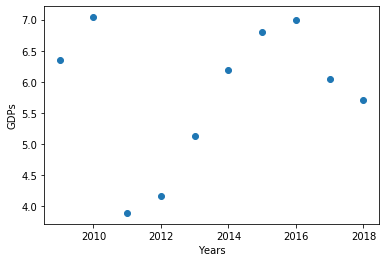

In [57]:
#Plot ROR VS STATE OF ECONOMY 

data = {'gdp':  GDPs,
        'years': YEARS}

df_data = pd.DataFrame (data, columns = ['gdp', 'years'])
plt.scatter(df_data["years"], df_data["gdp"])

plt.xlabel("Years")
plt.ylabel("GDPs");

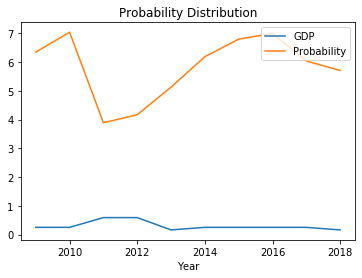

In [72]:
#PLOT PROBABILITIES OF OCCURANCE
YEARS = list(GDP_PLOT['Years'])
Probability = list(GDP_PLOT['Probability of Occurance'])
GDPs = list(GDP_PLOT['GDP'])
plt.plot(YEARS, Probability)
plt.plot(YEARS, GDPs)
plt.legend(["GDP", "Probability"], loc ="upper right")
plt.title('Probability Distribution')
plt.xlabel('Year')

plt.show()

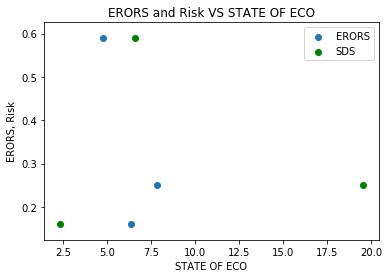

In [62]:
#PLOT RISK AND ERORS FOR INFY, RELIANCE, PORTFOLIO
ERORS = [7.86, 6.38, 4.77]
SDS = [19.55, 2.32, 6.61]
STATE_OF_ECOS=[0.25, 0.1607, 0.5893]
plt.scatter(ERORS, STATE_OF_ECOS)
plt.scatter(SDS, STATE_OF_ECOS, color = 'green')
plt.legend(["ERORS", "SDS"], loc ="upper right")
#plt.plot(YEARS, Probability)
plt.title('ERORS and Risk VS STATE OF ECO')
plt.xlabel('STATE OF ECO')
plt.ylabel('ERORS, Risk')
plt.show()

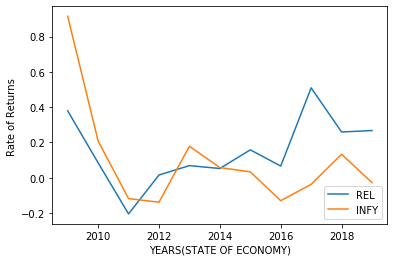

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#Plot RORs for a couple of years for Infosys
YEARS = list(Final_1['Years'])
#RORS_INFY = list(ROR['Returns'])
plt.plot(YEARS, RORS_REL)
plt.plot(YEARS, RORS)
plt.legend(["REL", "INFY"], loc ="lower right")
plt.xlabel("YEARS(STATE OF ECONOMY)")
plt.ylabel("Rate of Returns ");



Text(0.5, 1.0, 'Reliance')

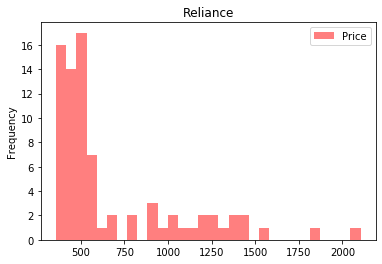

In [69]:
# Histogram Distribution for Reliace over a period of 10 years
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#df1 = pd.DataFrame(list(get_Dict_REL.items()),columns = ['Months','Price'])
#df1['Months']=df1['Months'].apply(pd.to_numeric, errors='coerce')
df1['Price']=df1['Price'].apply(pd.to_numeric, errors='coerce')
colors= ['red','green']
df1.plot.hist(bins =30,  color =colors, alpha =0.5,).set_title('Reliance')

Text(0.5, 1.0, 'Infy')

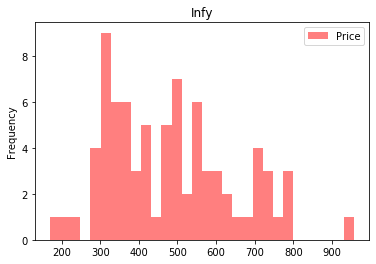

In [71]:
# Histogram Distribution for Infosys over a period of 10 years
%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#df = pd.DataFrame(list(get_Dict.items()),columns = ['Months','Price'])
#df['Months']=df['Months'].apply(pd.to_numeric, errors='coerce')
df['Price']=df['Price'].apply(pd.to_numeric, errors='coerce')
#df.plot.hist(bins=12, color ='red',alpha=0.5)
colors= ['red','green']
df.plot.hist(bins =30,  color = colors, alpha =0.5 ).set_title('Infy')


**Inference**

From the analysis we can infer that assuming constant state of economy
Risk associated with Infosys stock is 7.4 that with Reliance is 2.7 and on portfolio is 4.7

We can say that if an investor invests only in individual stock Infosys it becomes a risky proposition but if he invests in two or more his risk reduces(from 7.4 to 4.7 in this case). So instead of putting all eggs in one basket you invest in multilpe stocks in equal or varied proportion given the state of economy.

To see the complete benifit of diversification on risk reduction economist suggest investing in minimum of 10 securities.( I have limited it to 2 for the scope of this notebook.)

Studies have shown while diversification is beneficial excess of it is not. Beyond 10 stocks the effect of diversification reduces.

It might not be always possible to invest in different stocks with equal proportions which have balancing rate of returns.